<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-ederbiason/blob/main/Aula01_Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


## O que é Visão Computacional?

A **Visão Computacional** é uma área da Inteligência Artificial que busca permitir que os computadores 'vejam' e interpretem o mundo visual, assim como os humanos.

Ela utiliza imagens e vídeos como entrada e tenta extrair informações úteis, como:
- Detecção de objetos
- Reconhecimento facial
- Segmentação de imagem
- Rastreamento de movimento

A **Computação Gráfica**, por outro lado, está mais voltada à geração de imagens — como renderizar cenas em 3D.

Já o **Processamento de Imagens** se concentra na transformação e análise de imagens (normalmente 2D) para melhorar a qualidade ou extrair características.

| Área                  | Foco                             |
|-----------------------|----------------------------------|
| Visão Computacional   | Entendimento e interpretação     |
| Computação Gráfica    | Geração de imagens               |
| Processamento de Imagens | Manipulação e melhoria de imagens |


In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

In [ ]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://images.unsplash.com/photo-1745810187217-4d9e1ccfd9d5?ixlib=rb-4.1.0&q=85&fm=jpg&crop=entropy&cs=srgb&w=640"
image = Image.open(requests.get(url, stream=True).raw)
image = image.convert("RGB")  # Garante 3 canais

# Mostrar imagem
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

In [ ]:
# Separar os canais
r, g, b = image.split()

# Exibir os canais
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

In [ ]:
# Converter para escala de cinza
gray_image = image.convert("L")

# Mostrar imagem em tons de cinza
plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Explorando os pixels

In [ ]:
# Converter para numpy e mostrar valor de alguns pixels
np_image = np.array(image)
print("Formato da imagem:", np_image.shape)
print("Valor do pixel (0, 0):", np_image[0, 0])

new_pixels = 245 + np_image[0:5, 0:5, 0]
print(new_pixels)



Formato da imagem: (400, 640, 3)
Valor do pixel (0, 0): [114 109 115]
[[103 104 105 106 107]
 [103 104 105 106 107]
 [101 101 102 103 104]
 [100 101 102 103 104]
 [ 98  99 100 101 103]]


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


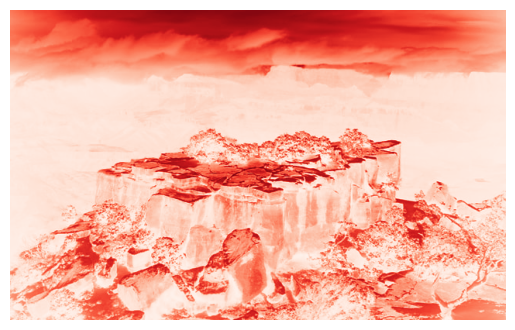

In [ ]:
# Exibir apenas o canal vermelho da imagem

r, g, b = image.split()

plt.imshow(r, cmap='Reds')
plt.axis('off')
plt.show()

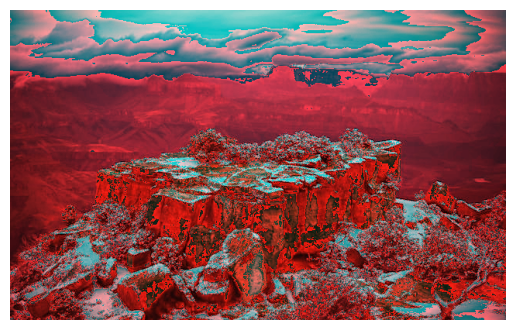

In [ ]:
# Modifique aleatoriamente o canal vermelho e gere a imagem novamente

np_image = np.array(image, dtype=float)
np_image[:,:,0] *= 5

image_convert = Image.fromarray(np_image.astype(np.uint8))

plt.imshow(image_convert)
plt.axis('off')
plt.show()

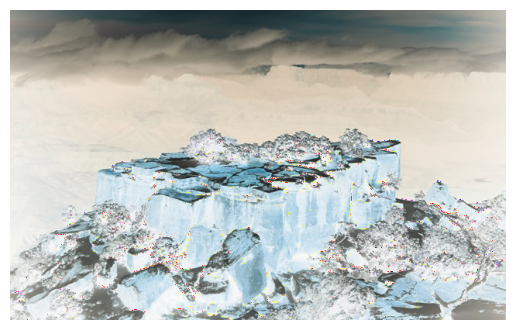

In [ ]:
# Criar uma imagem negativa (inverter as cores).

np_image = np.array(image, dtype=float)
np_image[:,:,0] *= -1
np_image[:,:,1] *= -1
np_image[:,:,2] *= -1

image_inverse = Image.fromarray(np_image.astype(np.uint8))

plt.imshow(image_inverse)
plt.axis('off')
plt.show()

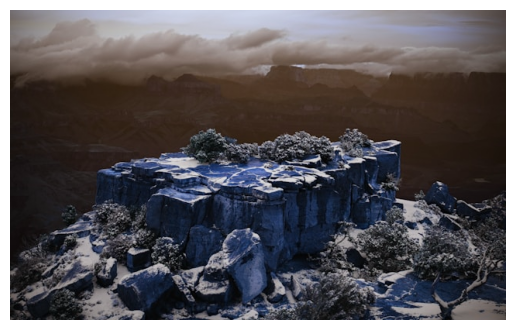

In [ ]:
# Salvar uma nova imagem modificada no disco

r, g, b = image.split()
im = Image.merge("RGB", (b, g, r))

plt.imshow(im)
plt.axis('off')
plt.show()

im.save("imagem.jpg")

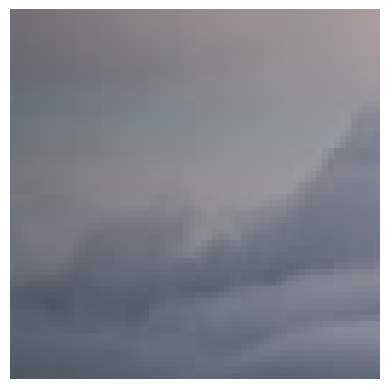

In [ ]:
# Recorte um pedaço da imagem e salve em disco

box = (0, 0, 64, 64)
region = image.crop(box)

plt.imshow(region)
plt.axis('off')
plt.show()

region.save("image-cortada.jpg")